In [91]:
import pandas as pd

df = pd.read_csv('../data/abt_churn.csv')
df.head()

,dtRef,idUsuario,qtdeTransacoes,qtdeDias,mediaTransacoesDias,saldoPontos,qtdePontosPos,qtdePontosNeg,qtdeDiasUltimaTransacao,qtdeDiasPrimeiraTransacao,...,saldoPontosD28,qtdePontosPosD28,qtdePontosNegD28,propAvgQtdeTransacoes,propAvgQtdeDias,propAvgMediaTransacoesDias,propAvgSaldoPontos,propAvgQtdePontosPos,propAvgQtdePontosNeg,flagChurn
0,2024-06-01,000ff655-fa9f-4baa-a108-47f581ec52a1,266,27,9.851852,635,2635,-2000,1.0,89.0,...,151,151,0,3.889781,3.278281,2.135602,1.516314,4.101926,8.944444,1
1,2024-10-01,000ff655-fa9f-4baa-a108-47f581ec52a1,268,28,9.571429,686,2686,-2000,4.0,211.0,...,51,51,0,3.309865,2.567615,2.328737,1.288278,2.920954,5.167037,1
2,2024-04-01,000ff655-fa9f-4baa-a108-47f581ec52a1,188,11,17.090909,275,1275,-1000,3.0,28.0,...,275,1275,-1000,3.805468,1.820201,3.739048,0.798622,2.634551,7.162791,0
3,2024-05-01,000ff655-fa9f-4baa-a108-47f581ec52a1,262,24,10.916667,484,2484,-2000,2.0,58.0,...,107,1107,-1000,4.246216,3.255244,2.322640,1.275749,4.275765,9.922414,0
4,2024-08-01,001749bd-37b5-4b1e-8111-f9fbba90f530,1,1,1.000000,50,50,0,21.0,21.0,...,50,50,0,0.013317,0.103973,0.236635,0.104533,0.063302,0.000000,1


In [92]:
oot = df[df['dtRef'] ==df['dtRef'].max()].copy()


In [93]:
df_train = df[df['dtRef'] < df['dtRef'].max()].copy()


In [94]:
features = df_train.columns[2:-1]
target = 'flagChurn'

x, y = df_train[features], df_train[target]

df_train.columns[2:-1]

Index(['qtdeTransacoes', 'qtdeDias', 'mediaTransacoesDias', 'saldoPontos',
       'qtdePontosPos', 'qtdePontosNeg', 'qtdeDiasUltimaTransacao',
       'qtdeDiasPrimeiraTransacao', 'qtdSkuDistintos', 'qtdeChatMessage',
       'qtdePresença', 'qtdeTrocaStreamElements', 'qtdeChurn', 'qtdePonei',
       'qtdeAirflowLover', 'qtdePresencaStreak', 'qtdeDailyLoot', 'qtdeRLover',
       'qtdeVendaItemRPG', 'qtdeTransacoesD7', 'qtdeDiasD7', 'saldoPontosD7',
       'qtdePontosPosD7', 'qtdePontosNegD7', 'qtdeTransacoesD14',
       'qtdeDiasD14', 'saldoPontosD14', 'qtdePontosPosD14', 'qtdePontosNegD14',
       'qtdeTransacoesD28', 'qtdeDiasD28', 'saldoPontosD28',
       'qtdePontosPosD28', 'qtdePontosNegD28', 'propAvgQtdeTransacoes',
       'propAvgQtdeDias', 'propAvgMediaTransacoesDias', 'propAvgSaldoPontos',
       'propAvgQtdePontosPos', 'propAvgQtdePontosNeg'],
      dtype='object')

In [95]:
# SAMPLE

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split (x, y, 
                                                                     random_state=42, 
                                                                     test_size=0.2,
                                                                     stratify=y
                                                                     )

In [96]:
print("Taxa variavel resposta Treino:", y_train.mean())
print("Taxa variavel resposta Teste:", y_test.mean())

Taxa variavel resposta Treino: 0.46894559460760715
Taxa variavel resposta Teste: 0.4687199230028874


In [97]:
# EXPLORE (MISSING)

X_train.isna().sum().sort_values(ascending=False)

qtdeTransacoes                0
qtdeDias                      0
mediaTransacoesDias           0
saldoPontos                   0
qtdePontosPos                 0
qtdePontosNeg                 0
qtdeDiasUltimaTransacao       0
qtdeDiasPrimeiraTransacao     0
qtdSkuDistintos               0
qtdeChatMessage               0
qtdePresença                  0
qtdeTrocaStreamElements       0
qtdeChurn                     0
qtdePonei                     0
qtdeAirflowLover              0
qtdePresencaStreak            0
qtdeDailyLoot                 0
qtdeRLover                    0
qtdeVendaItemRPG              0
qtdeTransacoesD7              0
qtdeDiasD7                    0
saldoPontosD7                 0
qtdePontosPosD7               0
qtdePontosNegD7               0
qtdeTransacoesD14             0
qtdeDiasD14                   0
saldoPontosD14                0
qtdePontosPosD14              0
qtdePontosNegD14              0
qtdeTransacoesD28             0
qtdeDiasD28                   0
saldoPon

In [98]:
df_analise = X_train.copy()
df_analise[target] = y_train
sumario = df_analise.groupby(by=target).agg(['mean', 'median']).T
sumario['diff_abs'] = sumario[0] - sumario[1]
sumario['diff_rel'] = sumario[0] / sumario[1]
sumario.sort_values(by=['diff_rel'], ascending=False)


,flagChurn,0,1,diff_abs,diff_rel
qtdeDiasD7,median,1.0,0.0,1.0,inf
qtdeTransacoesD7,median,3.0,0.0,3.0,inf
saldoPontosD7,median,50.0,0.0,50.0,inf
qtdePontosPosD7,median,52.0,0.0,52.0,inf
qtdePontosPosD14,median,107.0,1.0,106.0,107.0
...,...,...,...,...,...
qtdeVendaItemRPG,median,0.0,0.0,0.0,NaN
qtdePontosNegD7,median,0.0,0.0,0.0,NaN
qtdePontosNegD14,median,0.0,0.0,0.0,NaN
qtdePontosNegD28,median,0.0,0.0,0.0,NaN


In [99]:
from sklearn import tree
import matplotlib.pyplot as plt

arvore = tree.DecisionTreeClassifier(random_state=42)
arvore.fit(X_train, y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [100]:
feature_importances = (pd.Series(arvore.feature_importances_, index=X_train.columns)
                       .sort_values(ascending=False)
                       .reset_index()
                       )

feature_importances ['acum.'] = feature_importances [0].cumsum()
feature_importances[feature_importances['acum.'] < 0.96]

,index,0,acum.
0,qtdeDiasD14,0.230199,0.230199
1,propAvgQtdeDias,0.084999,0.315198
2,qtdeDiasPrimeiraTransacao,0.070867,0.386066
3,qtdeDiasUltimaTransacao,0.066065,0.452131
4,propAvgQtdePontosPos,0.054206,0.506337
5,propAvgSaldoPontos,0.048118,0.554455
6,propAvgQtdeTransacoes,0.045132,0.599586
7,propAvgMediaTransacoesDias,0.043305,0.642891
8,qtdeTransacoesD28,0.027234,0.670125
9,qtdePontosPos,0.022718,0.692844


In [101]:
best_features = (feature_importances.loc[feature_importances['acum.'] < 0.96, 'index']
                .to_list())

best_features

X_train[best_features]

,qtdeDiasD14,propAvgQtdeDias,qtdeDiasPrimeiraTransacao,qtdeDiasUltimaTransacao,propAvgQtdePontosPos,propAvgSaldoPontos,propAvgQtdeTransacoes,propAvgMediaTransacoesDias,qtdeTransacoesD28,qtdePontosPos,...,qtdePontosPosD7,saldoPontosD28,qtdePontosPosD28,qtdeDias,saldoPontos,qtdeTransacoesD14,saldoPontosD14,qtdePontosPosD14,qtdePresença,qtdSkuDistintos
1283,3,0.289318,12.0,10.0,0.174560,0.295608,0.038607,0.241858,3,150,...,0,150,150,3,150,3,150,150,3,1
3015,2,0.482197,25.0,6.0,0.299079,0.506474,0.154430,0.580460,12,257,...,51,257,257,5,257,6,104,104,5,2
3773,1,2.994404,98.0,6.0,2.763287,4.361164,0.640393,0.386389,13,1969,...,50,757,757,27,1969,1,50,50,25,4
1823,1,0.165473,7.0,7.0,0.109515,0.153916,0.080967,0.875096,4,53,...,53,53,53,1,53,4,53,53,1,2
4577,0,0.607107,107.0,15.0,0.242994,0.439370,0.395953,1.145970,1,228,...,0,1,1,7,228,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,3,1.763257,65.0,5.0,1.077548,1.650039,0.615863,0.621917,11,626,...,53,207,207,13,626,7,154,154,12,2
770,2,0.539178,14.0,11.0,0.340563,0.388108,0.066342,0.215391,2,100,...,0,100,100,2,100,2,100,100,2,1
1089,1,0.269589,3.0,3.0,0.173687,0.197935,0.066342,0.430781,2,51,...,51,51,51,1,51,2,51,51,1,2
4114,10,2.893180,72.0,2.0,1.888739,3.198475,0.682064,0.427283,38,1623,...,357,1069,1069,30,1623,19,707,707,28,3


In [102]:
# MODIFY

from feature_engine import discretisation, encoding
from sklearn import pipeline

# Discretizacão 
tree_discretization = discretisation.DecisionTreeDiscretiser(
    variables=best_features,
    regression=False,
    bin_output='bin_number',
    cv=3,
)


# Discretize X_train[best_features]
X_train_transform = tree_discretization.fit_transform(X_train[best_features], y_train)

# One-Hot 
onehot = encoding.OneHotEncoder(
    variables=best_features, 
    ignore_format=True
)
onehot.fit(X_train_transform, y_train)

X_train_transform = onehot.transform(X_train_transform)
X_train_transform

,qtdeDiasD14_3,qtdeDiasD14_2,qtdeDiasD14_1,qtdeDiasD14_0,qtdeDiasD14_4,qtdeDiasD14_6,qtdeDiasD14_5,propAvgQtdeDias_2,propAvgQtdeDias_3,propAvgQtdeDias_5,...,qtdePresença_5,qtdePresença_8,qtdePresença_11,qtdePresença_9,qtdePresença_6,qtdePresença_12,qtdePresença_0,qtdePresença_10,qtdSkuDistintos_0,qtdSkuDistintos_1
1283,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3015,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3773,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1823,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4577,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
770,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1089,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4114,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [103]:
#arvore_nova = tree.DecisionTreeClassifier(random_state=42)
#arvore_nova.fit(X_train_transform, y_train)

#(pd.Series(arvore_nova.feature_importances_, index=X_train_transform.columns)
    #.sort_values(ascending=False))

In [140]:
# Model
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import ensemble

#model= linear_model.LogisticRegression(penalty=None, random_state=42, max_iter=1000000)
#model = naive_bayes.GaussianNB()
model = ensemble.RandomForestClassifier(random_state=42,
                                        min_samples_leaf=20,
                                        n_jobs=1,
                                        n_estimators=500,
                                        )

model_pipeline = pipeline.Pipeline(
    steps=[
    ('discretizar', tree_discretization),
    ('onehot', onehot),
    ('Model', model),
    ]
)

import mlflow

# Configurar MLflow para usar o servidor local
mlflow.set_tracking_uri('http://127.0.0.1:5000/')
mlflow.set_experiment(experiment_name='churn_exp')

# Ensure any previous run is ended
mlflow.end_run()

with mlflow.start_run(run_name=model.__str__()):
    mlflow.sklearn.autolog()
    model_pipeline.fit(X_train[best_features], y_train)
    
    from sklearn import metrics

y_train_predict = model_pipeline.predict(X_train[best_features])
y_train_proba = model_pipeline.predict_proba(X_train[best_features])[:, 1]

acc_train = metrics.accuracy_score(y_train, y_train_predict)
auc_train = metrics.roc_auc_score(y_train, y_train_proba)
roc_train = metrics.roc_curve(y_train, y_train_proba)
print("Acurácia Treino:", acc_train)
print("AUC Treino:", auc_train)

y_test_predict = model_pipeline.predict(X_test[best_features])
y_test_proba = model_pipeline.predict_proba(X_test[best_features])[:, 1]

acc_test = metrics.accuracy_score(y_test, y_test_predict)
auc_test = metrics.roc_auc_score(y_test, y_test_proba)
roc_test = metrics.roc_curve(y_test, y_test_proba)
print("Acurácia Teste:", acc_test)
print("AUC Teste:", auc_test)

# Use the pipeline to transform and predict on OOT data
y_oot_predict = model_pipeline.predict(oot[best_features])
y_oot_proba = model_pipeline.predict_proba(oot[best_features])[:, 1]

acc_oot = metrics.accuracy_score(oot[target], y_oot_predict)
auc_oot = metrics.roc_auc_score(oot[target], y_oot_proba)
roc_oot = metrics.roc_curve(oot[target], y_oot_proba)
print("Acurácia OOT:", acc_oot)
print("AUC OOT:", auc_oot)

mlflow.log_metrics({
    'acc_train': acc_train,
    'auc_train': auc_train,
    'acc_test': acc_test,
    'auc_test': auc_test,
    'acc_oot': acc_oot,
    'auc_oot': auc_oot,
})

2025/09/22 17:59:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Elbia\OneDrive\Área de Trabalho\Projeto-Machine-Learning\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/09/22 17:59:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\

🏃 View run RandomForestClassifier(min_samples_leaf=20, n_estimators=500, n_jobs=1,
                       random_state=42) at: http://127.0.0.1:5000/#/experiments/675738959546292390/runs/c7b189abff674aa0ae79da021d209117
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/675738959546292390


2025/09/22 18:00:15 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Elbia\OneDrive\Área de Trabalho\Projeto-Machine-Learning\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/09/22 18:00:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\

Acurácia Treino: 0.7558979297063072
AUC Treino: 0.8404413434705796


2025/09/22 18:00:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Elbia\OneDrive\Área de Trabalho\Projeto-Machine-Learning\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/09/22 18:00:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\

Acurácia Teste: 0.7516843118383061
AUC Teste: 0.8256907865369163


2025/09/22 18:00:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Elbia\OneDrive\Área de Trabalho\Projeto-Machine-Learning\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/09/22 18:00:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\

Acurácia OOT: 0.7623762376237624
AUC OOT: 0.8325054466230937


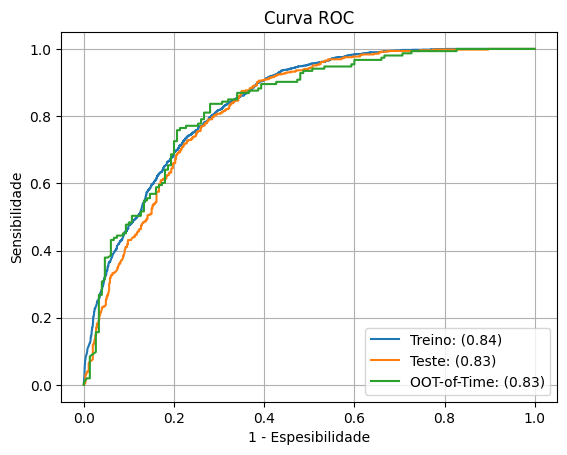

In [141]:
plt.plot(roc_train[0], roc_train[1])
plt.plot(roc_test[0], roc_test[1])
plt.plot(roc_oot[0], roc_oot[1])
plt.grid(True)
plt.ylabel("Sensibilidade")
plt.xlabel("1 - Espesibilidade")
plt.title('Curva ROC')
plt.legend([
    f"Treino: ({auc_train:.2f})", 
    f"Teste: ({auc_test:.2f})", 
    f"OOT-of-Time: ({auc_oot:.2f})",
])
